## Ergebnisse des Wahl-O-Mat zur Bundestagswahl 2025

In [29]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [30]:
df=pd.read_excel(r"C:\Users\Besitzer\Downloads\Wahl-O-Mat Bundestagswahl 2025_Datensatz_v1.01.xlsx", sheet_name="Datensatz BTW 2025")
df.head()
df.tail()

,Partei: Nr.,Partei: Kurzbezeichnung,Partei: Name,These: Nr.,These: Titel,These: These,Position: Position,Position: Begründung
1059,24,BüSo,Bürgerrechtsbewegung Solidarität,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme zu,Jeder sollte von seiner Arbeit leben können. F...
1060,25,BÜNDNIS DEUTSCHLAND,BÜNDNIS DEUTSCHLAND,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme nicht zu,Die Mindestlohnregelungen stellen einen gravie...
1061,26,BSW,Bündnis Sahra Wagenknecht – Vernunft und Gerec...,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme zu,NaN
1062,27,MERA25,MERA25 - Gemeinsam für Europäische Unabhängigkeit,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme zu,Wir setzen uns ein für einen bundesweiten effe...
1063,28,WerteUnion,WerteUnion,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme nicht zu,Lohnhöhen auszuhandeln ist Aufgabe der Tarifpa...


In [31]:
df_pivot = df.pivot(index="Partei: Kurzbezeichnung", columns="These: Titel", values="Position: Position")
df_pivot.head()

These: Titel,35-Stunden-Woche,Abschaffung der Frauenquote,Abschaffung von Zöllen,Abweisung Asylsuchender,Anhebung des Spitzensteuersatzes,Anwerbung von Fachkräften,Arbeitserlaubnis für Asylsuchende,Automatisierte Gesichtserkennung,Begrenzung der Mietpreise,Ehrenamt,Einschränkung des Streikrechts,Elternabhängiges BAföG,Energieintensive Unternehmen,Erhöhung des Mindestlohns,Erneuerbare Energien,Fossile Brennstoffe,Grundgesetz,Kompetenzen in der Schulpolitik,Kontrolle von Zulieferern,Krankenkassen,Nationale Währung,Nutzung der Kernenergie,Projekte gegen Rechtsextremismus,Rente nach 40 Beitragsjahren,Rüstungsexporte nach Israel,Schiene vor Straße,Schuldenbremse,Schwangerschaftsabbruch nach Beratung,Soziales Pflichtjahr,Strafrecht für unter 14-Jährige,Streichung des Bürgergelds,Tempolimit auf Autobahnen,Umlegung der Grundsteuer,Unterstützung der Ukraine,Verwerfen der Klimaziele,Volksentscheide,Zweite Staatsbürgerschaft,Ökologische Landwirtschaft
Partei: Kurzbezeichnung,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AfD,stimme nicht zu,stimme zu,stimme zu,stimme zu,stimme nicht zu,neutral,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,neutral,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,neutral,stimme nicht zu,stimme zu,stimme zu,neutral,stimme zu,stimme zu,stimme nicht zu,neutral,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu
BP,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,neutral,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,neutral,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,neutral,neutral,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu
BSW,neutral,stimme nicht zu,stimme zu,stimme zu,stimme zu,neutral,stimme nicht zu,neutral,stimme zu,neutral,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,neutral,stimme zu,neutral,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,neutral,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,neutral
BÜNDNIS DEUTSCHLAND,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,neutral,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,neutral,stimme zu,stimme zu,stimme nicht zu,stimme zu
BüSo,stimme zu,stimme zu,stimme zu,stimme zu,stimme zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme zu,stimme nicht zu


In [32]:
df_pivot["nein_count"] = (df_pivot == "nein").sum(axis=1)
df_pivot["neutral_count"] = (df_pivot == "neutral").sum(axis=1)
df_pivot["ja_count"] = (df_pivot == "ja").sum(axis=1)
df_pivot.head()

These: Titel,35-Stunden-Woche,Abschaffung der Frauenquote,Abschaffung von Zöllen,Abweisung Asylsuchender,Anhebung des Spitzensteuersatzes,Anwerbung von Fachkräften,Arbeitserlaubnis für Asylsuchende,Automatisierte Gesichtserkennung,Begrenzung der Mietpreise,Ehrenamt,Einschränkung des Streikrechts,Elternabhängiges BAföG,Energieintensive Unternehmen,Erhöhung des Mindestlohns,Erneuerbare Energien,Fossile Brennstoffe,Grundgesetz,Kompetenzen in der Schulpolitik,Kontrolle von Zulieferern,Krankenkassen,Nationale Währung,Nutzung der Kernenergie,Projekte gegen Rechtsextremismus,Rente nach 40 Beitragsjahren,Rüstungsexporte nach Israel,Schiene vor Straße,Schuldenbremse,Schwangerschaftsabbruch nach Beratung,Soziales Pflichtjahr,Strafrecht für unter 14-Jährige,Streichung des Bürgergelds,Tempolimit auf Autobahnen,Umlegung der Grundsteuer,Unterstützung der Ukraine,Verwerfen der Klimaziele,Volksentscheide,Zweite Staatsbürgerschaft,Ökologische Landwirtschaft,nein_count,neutral_count,ja_count
Partei: Kurzbezeichnung,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AfD,stimme nicht zu,stimme zu,stimme zu,stimme zu,stimme nicht zu,neutral,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,neutral,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,neutral,stimme nicht zu,stimme zu,stimme zu,neutral,stimme zu,stimme zu,stimme nicht zu,neutral,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,0,5,0
BP,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,neutral,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,neutral,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,neutral,neutral,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,0,4,0
BSW,neutral,stimme nicht zu,stimme zu,stimme zu,stimme zu,neutral,stimme nicht zu,neutral,stimme zu,neutral,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,neutral,stimme zu,neutral,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,neutral,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,neutral,0,8,0
BÜNDNIS DEUTSCHLAND,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,neutral,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,neutral,stimme zu,stimme zu,stimme nicht zu,stimme zu,0,2,0
BüSo,stimme zu,stimme zu,stimme zu,stimme zu,stimme zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme zu,stimme zu,stimme nicht zu,0,0,0


In [33]:
df_values = df_pivot.drop(columns=["nein_count", "neutral_count", "ja_count"])
match_counts = pd.DataFrame(index=df_pivot.index, columns=df_pivot.index)
for i in df_pivot.index:
    for j in df_pivot.index:
        row1_values = df_values.loc[i]
        row2_values = df_values.loc[j]
        match_counts.loc[i, j] = (row1_values == row2_values).sum()

In [34]:
for i in df_pivot.index:
    df_pivot[i] = match_counts[i]
df_pivot = df_pivot.drop(columns=df_pivot.columns[:41])
df_pivot.tail()

These: Titel,AfD,BP,BSW,BÜNDNIS DEUTSCHLAND,BüSo,Bündnis C,CDU / CSU,Die Gerechtigkeitspartei - Team Todenhöfer,Die Linke,Die PARTEI,FDP,FREIE WÄHLER,GRÜNE,MENSCHLICHE WELT,MERA25,MLPD,PIRATEN,PdF,PdH,SGP,SPD,SSW,Tierschutzpartei,Verjüngungsforschung,Volt,WerteUnion,dieBasis,ÖDP
Partei: Kurzbezeichnung,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Verjüngungsforschung,5,4,8,2,0,4,3,1,2,2,4,2,1,6,1,4,1,3,8,0,3,2,2,38,1,0,11,4
Volt,2,8,18,7,13,6,9,25,31,34,13,15,31,12,32,29,32,26,26,31,28,35,36,1,38,8,9,26
WerteUnion,28,27,11,32,24,25,22,19,9,9,28,23,10,22,10,9,10,12,12,12,11,8,9,0,8,38,16,11
dieBasis,19,20,15,17,19,23,13,18,11,10,7,14,9,19,12,14,13,12,12,15,12,11,11,11,9,16,38,14
ÖDP,7,9,16,11,19,13,11,23,25,26,9,18,22,16,25,24,26,24,19,26,21,25,26,4,26,11,14,38


In [35]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df_pivot.rename(index={"Die Gerechtigkeitspartei - Team Todenhöfer": "Team Todenhöfer"}, 
          columns={"Die Gerechtigkeitspartei - Team Todenhöfer": "Team Todenhöfer"}, 
          inplace=True)
df_pivot.head(50)

These: Titel,AfD,BP,BSW,BÜNDNIS DEUTSCHLAND,BüSo,Bündnis C,CDU / CSU,Team Todenhöfer,Die Linke,Die PARTEI,FDP,FREIE WÄHLER,GRÜNE,MENSCHLICHE WELT,MERA25,MLPD,PIRATEN,PdF,PdH,SGP,SPD,SSW,Tierschutzpartei,Verjüngungsforschung,Volt,WerteUnion,dieBasis,ÖDP
Partei: Kurzbezeichnung,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AfD,38,23,12,27,21,23,23,12,4,4,19,16,4,18,4,4,3,9,8,6,5,2,3,5,2,28,19,7
BP,23,38,6,27,19,27,21,14,6,6,20,23,8,17,6,8,10,9,11,9,7,10,6,4,8,27,20,9
BSW,12,6,38,10,16,8,12,21,23,21,14,14,19,11,23,20,18,16,14,22,19,17,19,8,18,11,15,16
BÜNDNIS DEUTSCHLAND,27,27,10,38,20,29,23,15,5,7,23,23,9,22,6,5,9,13,8,8,11,7,7,2,7,32,17,11
BüSo,21,19,16,20,38,22,18,19,16,16,16,15,16,23,15,15,16,14,13,18,14,14,14,0,13,24,19,19
Bündnis C,23,27,8,29,22,38,19,14,5,8,16,23,9,21,6,7,10,13,7,9,9,7,6,4,6,25,23,13
CDU / CSU,23,21,12,23,18,19,38,13,7,8,22,22,14,18,6,4,9,17,12,6,16,11,9,3,9,22,13,11
Team Todenhöfer,12,14,21,15,19,14,13,38,26,26,17,21,24,19,27,26,29,20,18,30,23,23,26,1,25,19,18,23
Die Linke,4,6,23,5,16,5,7,26,38,32,10,13,29,11,36,31,31,24,23,33,27,30,32,2,31,9,11,25


In [36]:
total_questions = 38
df_percent = (df_pivot / total_questions) * 100
df_percent = df_percent.astype(int)
df_percent.head(50)

These: Titel,AfD,BP,BSW,BÜNDNIS DEUTSCHLAND,BüSo,Bündnis C,CDU / CSU,Team Todenhöfer,Die Linke,Die PARTEI,FDP,FREIE WÄHLER,GRÜNE,MENSCHLICHE WELT,MERA25,MLPD,PIRATEN,PdF,PdH,SGP,SPD,SSW,Tierschutzpartei,Verjüngungsforschung,Volt,WerteUnion,dieBasis,ÖDP
Partei: Kurzbezeichnung,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AfD,100,60,31,71,55,60,60,31,10,10,50,42,10,47,10,10,7,23,21,15,13,5,7,13,5,73,50,18
BP,60,100,15,71,50,71,55,36,15,15,52,60,21,44,15,21,26,23,28,23,18,26,15,10,21,71,52,23
BSW,31,15,100,26,42,21,31,55,60,55,36,36,50,28,60,52,47,42,36,57,50,44,50,21,47,28,39,42
BÜNDNIS DEUTSCHLAND,71,71,26,100,52,76,60,39,13,18,60,60,23,57,15,13,23,34,21,21,28,18,18,5,18,84,44,28
BüSo,55,50,42,52,100,57,47,50,42,42,42,39,42,60,39,39,42,36,34,47,36,36,36,0,34,63,50,50
Bündnis C,60,71,21,76,57,100,50,36,13,21,42,60,23,55,15,18,26,34,18,23,23,18,15,10,15,65,60,34
CDU / CSU,60,55,31,60,47,50,100,34,18,21,57,57,36,47,15,10,23,44,31,15,42,28,23,7,23,57,34,28
Team Todenhöfer,31,36,55,39,50,36,34,100,68,68,44,55,63,50,71,68,76,52,47,78,60,60,68,2,65,50,47,60
Die Linke,10,15,60,13,42,13,18,68,100,84,26,34,76,28,94,81,81,63,60,86,71,78,84,5,81,23,28,65


In [37]:
df_percent.to_csv("df_percent.csv",index=False)

In [38]:
fig = go.Figure(data=go.Heatmap(
    z=df_percent.values,
    x=df_percent.columns,
    y=df_percent.index,
    colorscale="Viridis",
    showscale=False,  
    text=df_percent.values,
    texttemplate="%{text}"  
))
fig.update_layout(
    title="Übereinstimmungen zwischen Parteien in %",
    xaxis=dict( tickangle=-45, automargin=True),
    width=1000, 
    height=1000
)
fig.show(config={"displayModeBar": False})  

In [39]:
df = df_percent.copy()
matrix = df.values
linkage = sch.linkage(matrix, method="ward")  
dendro = sch.dendrogram(linkage, labels=df.index, no_plot=True)
sorted_indices = dendro["leaves"]  
df_reordered = df.iloc[sorted_indices, sorted_indices]
fig = go.Figure(data=go.Heatmap(
    z=df_reordered.values,
    x=df_reordered.columns,
    y=df_reordered.index,
    colorscale="portland",
    showscale=False,
    text=df_reordered.values,
    texttemplate="%{text}"
))
fig.update_layout(
    title="Übereinstimmungen laut Wahl-O-Mat zwischen den Parteien in %",
    xaxis=dict(
        tickangle=-45,
        automargin=True,
        showgrid=False,  
        zeroline=False,  
        visible=True  
    ),
    yaxis=dict(
        scaleanchor="x",
        showgrid=False,  
        zeroline=False, 
        visible=True 
    ),
    width=1000,
    height=1000,
    margin=dict(t=80, b=50, l=50, r=50)  
)
fig.show(config={"displayModeBar": False})  

In [40]:
df_percent = df_percent.drop("Verjüngungsforschung", axis=0) 
df_percent = df_percent.drop("Verjüngungsforschung", axis=1)  

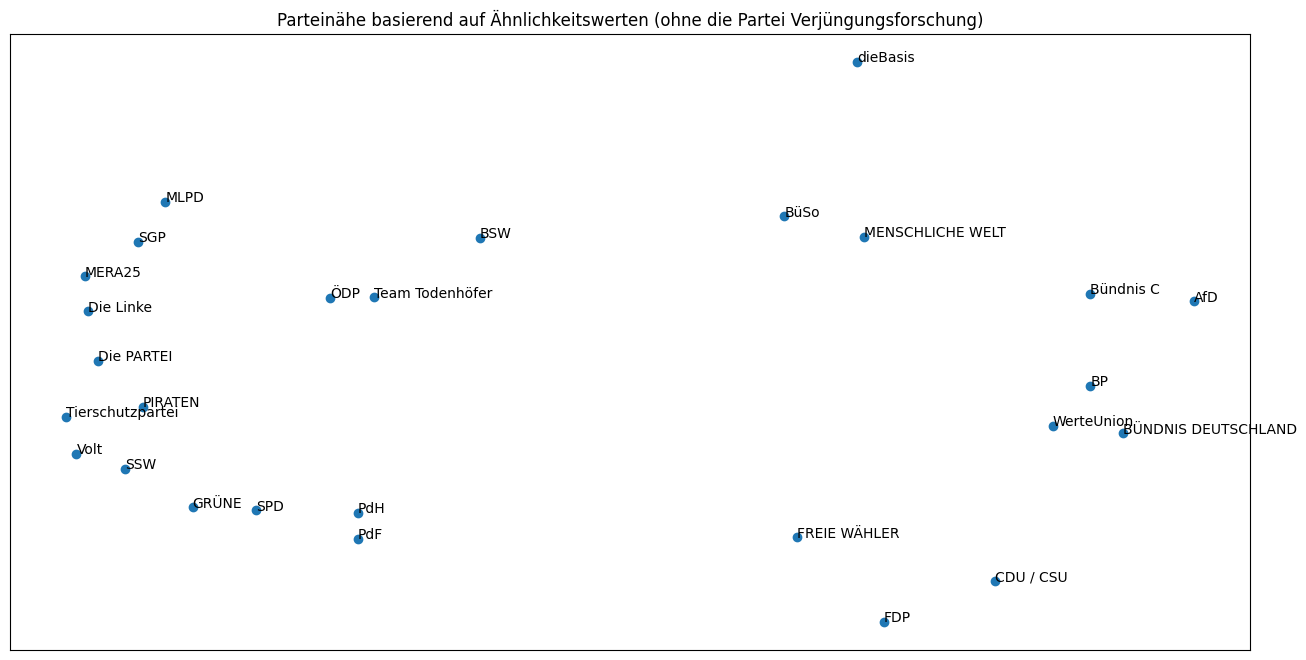

In [41]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_percent)
pca_df = pd.DataFrame(pca_result, index=df_percent.index, columns=['PCA1', 'PCA2'])
plt.figure(figsize=(16, 8))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"])
for i in pca_df.index:
    plt.annotate(i, (pca_df.loc[i, "PCA1"], pca_df.loc[i, "PCA2"]))
plt.title("Parteinähe basierend auf Ähnlichkeitswerten (ohne die Partei Verjüngungsforschung)")
plt.xticks([])  
plt.yticks([]) 
plt.show()